In [1]:
%pip install pandas-datareader
%pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader.data as web
import datetime

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
import yfinance as yf

start = datetime.datetime(2019, 2, 4)
end = datetime.datetime(2024, 2, 29)

bitcoin = yf.download("BTC-USD", start=start, end=end)
print(bitcoin.head())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-02-04  3467.211670  3476.223877  3442.586914  3459.154053  3459.154053   
2019-02-05  3454.950928  3478.148193  3451.937012  3466.357422  3466.357422   
2019-02-06  3469.091797  3469.091797  3398.565430  3413.767822  3413.767822   
2019-02-07  3414.929443  3427.945557  3394.218506  3399.471680  3399.471680   
2019-02-08  3401.376465  3695.614014  3391.023682  3666.780273  3666.780273   

                Volume  
Date                    
2019-02-04  5332718886  
2019-02-05  5227549545  
2019-02-06  5482196038  
2019-02-07  5004962683  
2019-02-08  7735623101  


In [5]:
def get_data(ticker, is_crypto=True):
    if is_crypto:
        ticker = f"{ticker}-USD"
    data = yf.download(ticker, start=start, end=end)
    column_name = f"{ticker}_Close" if is_crypto else f"{ticker}_Close"
    data[column_name] = data["Close"]
    data = data[[column_name]]
    print(data.head())
    return data

In [6]:
# For cryptocurrencies, set is_crypto=True
bitcoin = get_data("BTC", is_crypto=True)

# For stocks and ETFs, set is_crypto=False
sp500 = get_data("SPY", is_crypto=False)
treasury = get_data("SPTL", is_crypto=False)

[*********************100%%**********************]  1 of 1 completed


            BTC-USD_Close
Date                     
2019-02-04    3459.154053
2019-02-05    3466.357422
2019-02-06    3413.767822
2019-02-07    3399.471680
2019-02-08    3666.780273


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

             SPY_Close
Date                  
2019-02-04  271.959991
2019-02-05  273.100006
2019-02-06  272.739990
2019-02-07  270.140015
2019-02-08  270.470001
            SPTL_Close
Date                  
2019-02-04   34.680000
2019-02-05   34.849998
2019-02-06   34.849998
2019-02-07   35.090000
2019-02-08   35.240002


In [7]:
from functools import reduce
def combine_data(tickers, is_crypto_list):
    data_frames = []
    for ticker, is_crypto in zip(tickers, is_crypto_list):
        data_frames.append(get_data(ticker, is_crypto=is_crypto))
    df_merged = reduce(lambda left, right: pd.merge(left, right, on=["Date"], how="outer"), data_frames)
    return df_merged

initial_portfolio = ["BTC", "SPY", "SPTL"]
is_crypto_list = [True, False, False]
combined_data = combine_data(initial_portfolio, is_crypto_list)
print(combined_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

            BTC-USD_Close
Date                     
2019-02-04    3459.154053
2019-02-05    3466.357422
2019-02-06    3413.767822
2019-02-07    3399.471680
2019-02-08    3666.780273
             SPY_Close
Date                  
2019-02-04  271.959991
2019-02-05  273.100006
2019-02-06  272.739990
2019-02-07  270.140015
2019-02-08  270.470001
            SPTL_Close
Date                  
2019-02-04   34.680000
2019-02-05   34.849998
2019-02-06   34.849998
2019-02-07   35.090000
2019-02-08   35.240002
            BTC-USD_Close   SPY_Close  SPTL_Close
Date                                             
2019-02-04    3459.154053  271.959991   34.680000
2019-02-05    3466.357422  273.100006   34.849998
2019-02-06    3413.767822  272.739990   34.849998
2019-02-07    3399.471680  270.140015   35.090000
2019-02-08    3666.780273  270.470001   35.240002


In [8]:
from functools import reduce

def combine_returns(tickers):
    data_frames = []
    for ticker in tickers:
        is_crypto = ticker == "BTC"
        data = get_data(ticker, is_crypto=is_crypto).copy()  # Create a copy of the DataFrame
        column_name = f"{ticker}-USD_Close" if is_crypto else f"{ticker}_Close"
        data[f"{ticker}_returns"] = data[column_name].pct_change()
        data_frames.append(data[[column_name, f"{ticker}_returns"]])  # Keep both price and return columns
    df_merged = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how="outer"), data_frames)
    return df_merged

assets = ["BTC", "SPY", "SPTL"]
portfolio = combine_returns(assets)
print(portfolio.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

            BTC-USD_Close
Date                     
2019-02-04    3459.154053
2019-02-05    3466.357422
2019-02-06    3413.767822
2019-02-07    3399.471680
2019-02-08    3666.780273



[*********************100%%**********************]  1 of 1 completed

             SPY_Close
Date                  
2019-02-04  271.959991
2019-02-05  273.100006
2019-02-06  272.739990
2019-02-07  270.140015
2019-02-08  270.470001
            SPTL_Close
Date                  
2019-02-04   34.680000
2019-02-05   34.849998
2019-02-06   34.849998
2019-02-07   35.090000
2019-02-08   35.240002
            BTC-USD_Close  BTC_returns   SPY_Close  SPY_returns  SPTL_Close  \
Date                                                                          
2019-02-04    3459.154053          NaN  271.959991          NaN   34.680000   
2019-02-05    3466.357422     0.002082  273.100006     0.004192   34.849998   
2019-02-06    3413.767822    -0.015171  272.739990    -0.001318   34.849998   
2019-02-07    3399.471680    -0.004188  270.140015    -0.009533   35.090000   
2019-02-08    3666.780273     0.078632  270.470001     0.001222   35.240002   

            SPTL_returns  
Date                      
2019-02-04           NaN  
2019-02-05      0.004902  
2019-02-06      

In [9]:
from pypfopt.efficient_frontier import EfficientCVaR

In [10]:
from pypfopt.risk_models import CovarianceShrinkage
import numpy as np

# Fill NaN values with the value from the preceding row
portfolio.fillna(method='bfill', inplace=True)
portfolio.fillna(method='ffill', inplace=True)

portfolio.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio.fillna(method='ffill', inplace=True)
portfolio.fillna(method='bfill', inplace=True)

In [11]:
import numpy as np
portfolio.isin([np.inf, -np.inf]).any()

BTC-USD_Close    False
BTC_returns      False
SPY_Close        False
SPY_returns      False
SPTL_Close       False
SPTL_returns     False
dtype: bool

In [12]:
portfolio.nunique()

BTC-USD_Close    1851
BTC_returns      1850
SPY_Close        1241
SPY_returns      1274
SPTL_Close        924
SPTL_returns     1261
dtype: int64

In [13]:
portfolio.isna().any()

BTC-USD_Close    False
BTC_returns      False
SPY_Close        False
SPY_returns      False
SPTL_Close       False
SPTL_returns     False
dtype: bool

In [14]:
print(portfolio.describe())

       BTC-USD_Close  BTC_returns    SPY_Close  SPY_returns   SPTL_Close  \
count    1851.000000  1851.000000  1851.000000  1851.000000  1851.000000   
mean    25661.094950     0.002184   380.633269     0.000450    37.277726   
std     16149.469148     0.034897    63.866968     0.013340     6.575604   
min      3399.471680    -0.371695   222.949997    -0.109424    24.549999   
25%     10140.256836    -0.012727   321.125000    -0.004528    30.709999   
50%     23289.314453     0.000914   393.739990     0.000693    39.070000   
75%     38411.103516     0.016637   434.619995     0.006877    42.220001   
max     67566.828125     0.187465   507.850006     0.090603    49.270000   

       SPTL_returns  
count   1851.000000  
mean      -0.000700  
std        0.010536  
min       -0.061342  
25%       -0.007095  
50%       -0.000995  
75%        0.005300  
max        0.071898  


In [15]:
print(portfolio)

            BTC-USD_Close  BTC_returns   SPY_Close  SPY_returns  SPTL_Close  \
Date                                                                          
2019-02-04    3459.154053     0.002082  271.959991     0.004192   34.680000   
2019-02-05    3466.357422     0.002082  273.100006     0.004192   34.849998   
2019-02-06    3413.767822    -0.015171  272.739990    -0.001318   34.849998   
2019-02-07    3399.471680    -0.004188  270.140015    -0.009533   35.090000   
2019-02-08    3666.780273     0.078632  270.470001     0.001222   35.240002   
2019-02-09    3671.203613     0.001206  270.619995     0.000555   35.119999   
2019-02-10    3690.188232     0.005171  270.619995     0.000555   35.119999   
2019-02-11    3648.430664    -0.011316  270.619995     0.000555   35.119999   
2019-02-12    3653.528564     0.001397  274.100006     0.012859   35.009998   
2019-02-13    3632.070557    -0.005873  274.989990     0.003247   34.900002   
2019-02-14    3616.880859    -0.004182  274.380005  

In [16]:
from sklearn.covariance import empirical_covariance
from pypfopt.expected_returns import mean_historical_return

# Replace infinite values with NaN and fill NaN values
portfolio.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio.fillna(method='ffill', inplace=True)
portfolio.fillna(method='bfill', inplace=True)

# Select only the price columns for mean historical return calculation
price_columns = [f"{ticker}-USD_Close" if ticker == "BTC" else f"{ticker}_Close" for ticker in assets]
prices = portfolio[price_columns]

# Calculate the mean historical return
mu = mean_historical_return(prices)

# Calculate the covariance matrix of returns
returns = portfolio[[f"{ticker}_returns" for ticker in assets]]
S = returns.cov()

In [17]:
print(S)

               BTC_returns  SPY_returns  SPTL_returns
BTC_returns   1.217777e-03     0.000119 -6.489904e-07
SPY_returns   1.186977e-04     0.000178 -3.441350e-05
SPTL_returns -6.489904e-07    -0.000034  1.110072e-04


In [18]:
print(mu)

BTC-USD_Close    0.483256
SPY_Close        0.088330
SPTL_Close      -0.030722
dtype: float64


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier

# Regularize the covariance matrix
S_reg = S + np.eye(S.shape[0]) * 1e-6

# Initialize the EfficientFrontier object with solver options
ef = EfficientFrontier(mu, S_reg, solver_options={"eps_abs": 1e-4, "eps_rel": 1e-4})

# Optimize the portfolio for maximum Sharpe ratio
weights = ef.max_sharpe()

# Clean the weights (round small weights to zero)
cleaned_weights = ef.clean_weights()

# Print the cleaned weights
print(dict(cleaned_weights))

{'BTC-USD_Close': 0.72554, 'SPY_Close': 0.27446, 'SPTL_Close': 0.0}


In [20]:
from pypfopt.efficient_frontier import EfficientFrontier

# Initialize the EfficientFrontier object
ef = EfficientFrontier(mu, S)

# Find the portfolio weights that maximize the Sharpe ratio
weights = ef.max_sharpe()

# Clean the weights to remove very small values
cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'BTC-USD_Close': 0.72478, 'SPY_Close': 0.27522, 'SPTL_Close': 0.0}


In [21]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print(f"Funds remaining: {leftover:.2f}")

Discrete allocation: {'SPY_Close': 5}
Funds remaining: 7468.70


In [22]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 37.5%
Annual volatility: 2.6%
Sharpe Ratio: 13.40


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abf7e3b5-f1ce-4ffe-8b70-21ea367b225a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [24]:
import matplotlib.pyplot as plt
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Expected annual return: 32.6%
Annual volatility: 2.3%
Sharpe Ratio: 13.34


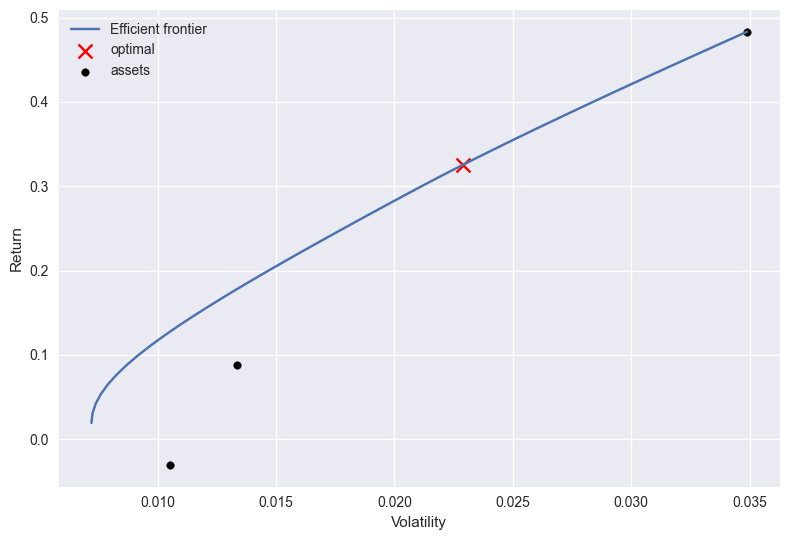

In [25]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

ax = plotting.plot_efficient_frontier(cla, showfig=False)

C:\Users\money\anaconda3\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


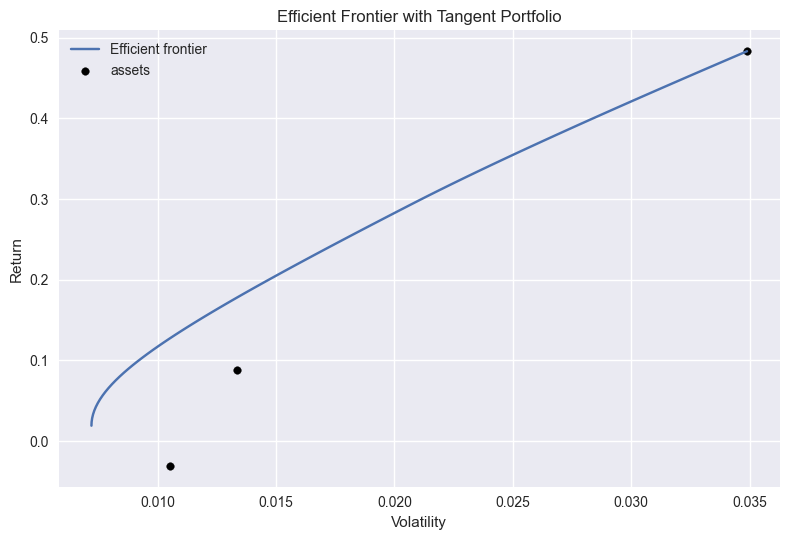

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientFrontier
import seaborn as sns

#plt.style.use('Solarize_Light2')

# Generate a range of possible risk-return values
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Show the plot
ax.set_title("Efficient Frontier with Tangent Portfolio")
ax.legend()
plt.tight_layout()
plt.show()